# Apresentações


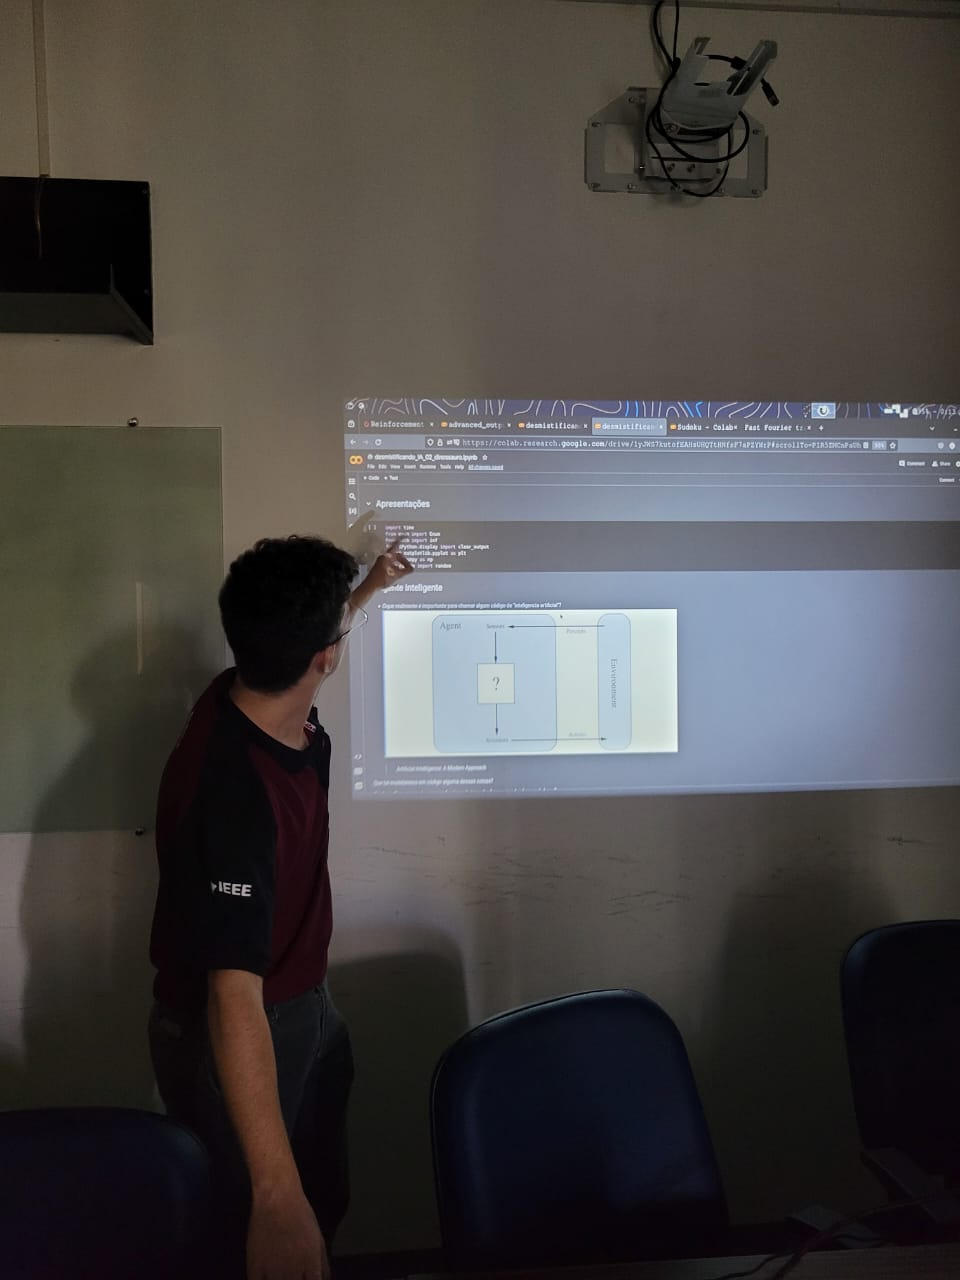

In [ ]:
import time
from enum import Enum
from math import inf
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from random import random

# Agente inteligente
- Oque realmente é importante para chamar algum código de "inteligencia artificial"?
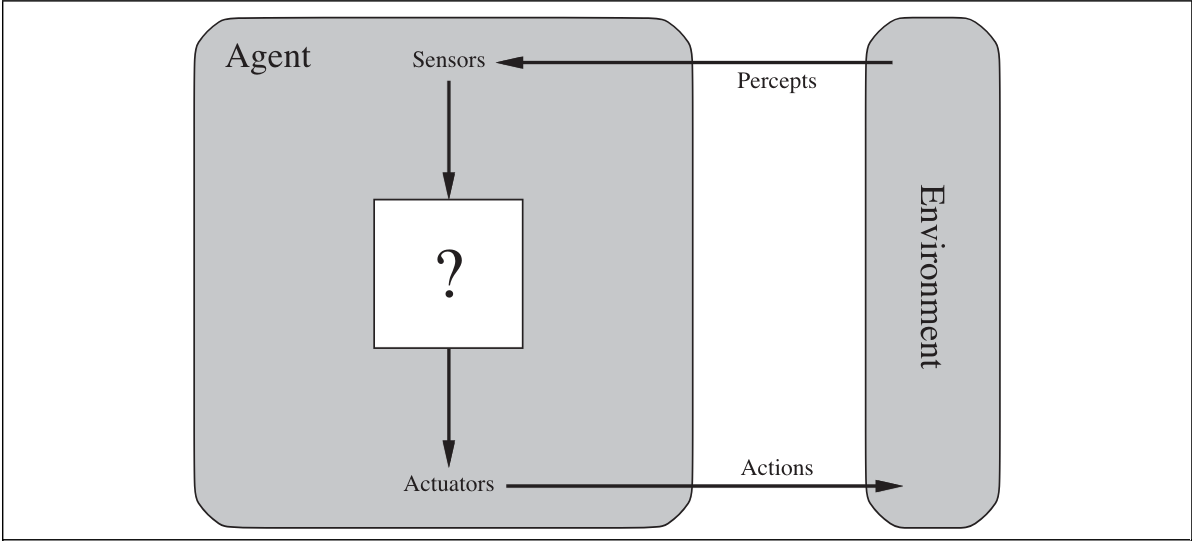
> Artificial Intelligence: A Modern Approach

Que tal modelarmos em código alguma dessas coisas?

Ainda melhor: e se usássemos o famigerado jogo do dinossauro do chrome de base?

In [ ]:
# Lista as possiveis ações do agente
class Acao(Enum):
  NADA = 0
  PULAR = 1

In [ ]:
# Situação que o agente vai perceber
class Ambiente:
  # Todo novo cacto será adicionado aqui
  def __init__(self):
    self.cactos = []

  # Representará a percepção do agente
  def cacto_mais_proximo(self):
    if len(self.cactos) == 0: return Cacto(x=inf)
    cacto_mais_proximo = self.cactos[0]
    for cacto in self.cactos:
      if cacto.x < cacto_mais_proximo.x:
        cacto_mais_proximo = cacto
    return cacto

In [ ]:
# O agente
class Dinossauro:

  velocidade_vertical = 0
  forca_pulo = 1
  pulando = False

  def __init__(self, x=0,y=0):
    self.x = x
    self.y = y

  # Representará o cérebro do agente
  def reagir(self,ambiente):
    if ambiente.cacto_mais_proximo().x < 10:
      return Acao.PULAR
    return Acao.NADA

⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛🌵🌵⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛🌵🌵⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛<br>
⬛⬛⬛⬛⬛⬛🌵🌵⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🦖<br>


# Jogo
Para podermos ver o dinossauro em ação precisamos de algo para fazer as coisas se moverem. Na vida real temos as leis da física, já na computação infelizmente não é possível apenas escrever:

```python
import physics
```
E esperar que o dinossauro comece a se mover sozinho. Então precisamos fazer nosso dever de casa e implementar algumas coisas:

Sinta-se livre para ignorar essa parte pelo momento.

In [ ]:
class Cacto:
  def __init__(self,x=0,h=3,w=2):
    self.x = x
    self.h = h
    self.w = w

  def verifica_hitbox(self,x,y,v):
    return self.x + self.w > x > self.x - v and self.h > y

In [ ]:
class Engine:
  pontos = 0
  velocidade = 1
  gravidade = .1
  aceleracao = .01
  def __init__(self,x=100,y=10,dinossauro=None):
    self.x = x
    self.y = y
    if dinossauro == None:
      dinossauro = Dinossauro(0,0)
    self.dinossauro = dinossauro
    self.ambiente = Ambiente()

  def desenho(self):
    clear_output()
    #print("\b"*(self.x*self.y+self.y))
    for i in range(self.y):
      for j in range(self.x):
        virtual_x = self.x - 1 - j
        virtual_y = self.y - 1 - i
        if self.verifica_cacto(virtual_x,virtual_y):
          print("🌵",end="")
          continue
        if self.verifica_dinossauro(virtual_x,virtual_y):
          print("🦖",end="")
          continue
        else:
          print("⬛",end="")
          continue
      print()

  def verifica_cacto(self,x,y):
    for cacto in self.ambiente.cactos:
      if cacto.verifica_hitbox(x,y,0):
        return True
    return False

  def verifica_dinossauro(self, x,y):
    return abs(self.dinossauro.x - x) <= 0.5 and abs(self.dinossauro.y - y) <= 0.5

  def novo_cacto(self):
    self.ambiente.cactos.append(Cacto(self.x,3,2))

  def frame(self):
    if self.pontos%50 == 0:
      self.novo_cacto()
    self.dinossauro.y += self.dinossauro.velocidade_vertical
    self.dinossauro.velocidade_vertical -= self.gravidade
    if self.dinossauro.y < 0:
      self.dinossauro.y = 0
      self.dinossauro.pulando = False
      self.dinossauro.velocidade_vertical = 0
    cacto_i = 0
    while cacto_i < len(self.ambiente.cactos):
      cacto = self.ambiente.cactos[cacto_i]
      if cacto.verifica_hitbox(self.dinossauro.x,self.dinossauro.y,self.velocidade):
        return False
      cacto.x -= self.velocidade
      if cacto.x < -1:
        self.ambiente.cactos.pop(cacto_i)
        cacto_i -= 1
      cacto_i += 1
    self.pontos += 1
    self.acelera()
    return True

  def acelera(self):
    self.velocidade += self.aceleracao

  def receber_entrada(self):
    acao = self.dinossauro.reagir(self.ambiente)
    if acao == Acao.PULAR and not self.dinossauro.pulando:
      self.dinossauro.pulando = True
      self.dinossauro.velocidade_vertical += self.dinossauro.forca_pulo


# Testando
Agora que tudo foi contido de forma segura atrás de uma abstração, podemos experimentar com o jogo.

In [ ]:
# Toda vez que essa linha é executada, o mundo é reiniciado
engine = Engine(x=30)

In [ ]:
# Essa função ajuda a visualizar oque está acontecendo.
# Quando o tempo não é definido, o jogo executa até a morte do dinossauro
# O retorno de testar a engine é convenientemente a pontuação do jogo
def testar_engine(engine,tempo=-1):
  iterador = 0
  while iterador!=tempo:
    time.sleep(.5)
    engine.desenho()
    engine.receber_entrada()
    if not engine.frame():
      engine.desenho()
      return engine.pontos
    iterador += 1
  return engine.pontos

In [ ]:
# Se for executada mais de uma vez antes de resetar o mundo
# O jogo continua de onde parou, mesmo que o dinossauro tenha batido as botas
pontuacao = testar_engine(engine,35)
print(pontuacao," pontos")

⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🦖
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
35  pontos


In [ ]:
# A outra forma é muito lenta, então podemos ignorar a beleza e focar nos números
while engine.frame():
  engine.receber_entrada()
print(engine.pontos," pontos")

209  pontos


Enquanto a primeira versão tem no máximo 2 fps, a segunda executa a aproximadamente 26125 fps.

Apenas o necessário. Nada a mais, nada a menos.

# Parametrizando
Por que o dinossauro pula quando o cacto mais próximo está a 10 de distância?
- E se fosse 11?
- talvez 9?

Muitas vezes colocamos números mágicos nos nossos códigos por serem o melhor valor que encontramos enquanto testávamos.

E se existisse uma forma de encontrar valores melhores?

In [ ]:
# Quando nenhum parametro é passado
# O comportamento do dinossauro padrão é mantido
class DinossauroParametrizado(Dinossauro):
  def __init__(self, x=0,y=0,parametro=10):
    Dinossauro.__init__(self,x,y)
    self.parametro = parametro

  def reagir(self,ambiente):
    if ambiente.cacto_mais_proximo().x < self.parametro:
      return Acao.PULAR
    return Acao.NADA

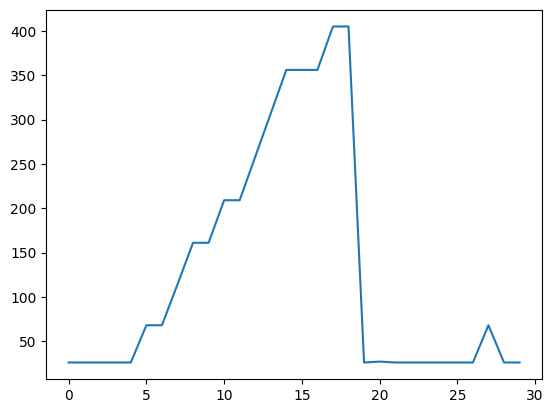

In [ ]:
resultadosDinossauroParametrizado = []
# distancia de pulo é limitada para o tamanho em caracteres da janela do jogo
largura_janela = 30
for distancia_pulo in range(0,largura_janela):
  engineParametrizada = Engine(
      x = largura_janela,
      dinossauro = DinossauroParametrizado(
          parametro = distancia_pulo
          )
      )
  while engineParametrizada.frame():
    engineParametrizada.receber_entrada()
  resultadosDinossauroParametrizado.append(engineParametrizada.pontos)

plt.plot(resultadosDinossauroParametrizado)

Testar cada um dos parametros parece ser custoso, principalmente por podermos ter uma granularidade arbitrariamente grande ou pequena dependendo do nível de precisão desejado.

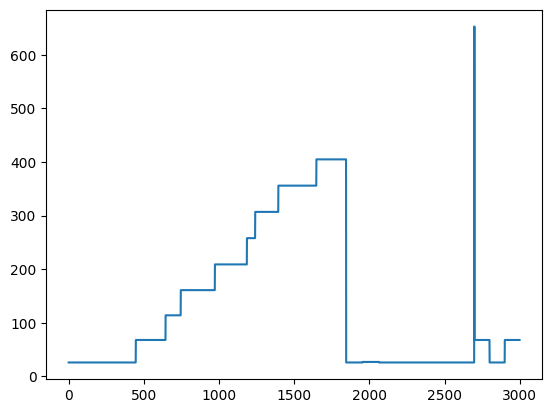

In [ ]:
resultadosDinossauroParametrizadoMaior = []
largura_janela = 30
# Mesmo que o jogo não divida um frame em "subframes"
# O maior detalhe na busca de parâmetros permite encontrar
# Algumas relações que previamente estavam ocultas
for distancia_pulo in range(0,largura_janela*100):
  engineParametrizada = Engine(
      x = largura_janela,
      dinossauro = DinossauroParametrizado(parametro = distancia_pulo/100.0)
      )
  while engineParametrizada.frame():
    engineParametrizada.receber_entrada()
  resultadosDinossauroParametrizadoMaior.append(engineParametrizada.pontos)

plt.plot(resultadosDinossauroParametrizadoMaior)

Até que ponto vale apena buscar por cada valor virtualmente possivel de ser passado como entrada?

# Otimizando

A partir de certo ponto é possível notar que simplesmente testar todas as possibilidades para de valer a pena. Então técnicas de otimização de busca são implementadas.

In [ ]:
resultadosDinossauroOtimizado = []
melhor_pontuacao = 0
# Começando de um incremento pre determinado para o pulo do dinossauro
distancia_pulo = 0
valor_aumento = 5
while distancia_pulo < 30:
  engineParametrizada = Engine(
      x = 30,
      dinossauro = DinossauroParametrizado(parametro = distancia_pulo)
      )

  while engineParametrizada.frame():
    engineParametrizada.receber_entrada()
  pontuacao = engineParametrizada.pontos

  # Toda vez que a pontuação começa a diminuir a quantidade incrementada
  # É dividida pela metade e a distância do pulo do agente
  # Volta para o momento antes do resultado piorar
  if (pontuacao >= melhor_pontuacao):
    resultadosDinossauroOtimizado.append((distancia_pulo,pontuacao))
    melhor_pontuacao = pontuacao
    distancia_pulo += valor_aumento
  else:
    resultadosDinossauroOtimizado.append((distancia_pulo,pontuacao))
    if (valor_aumento == 1): break
    distancia_pulo -= valor_aumento
    valor_aumento = 1
    distancia_pulo += valor_aumento


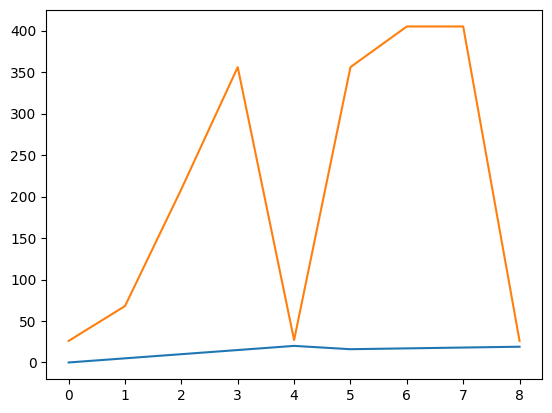

In [ ]:
plt.plot(resultadosDinossauroOtimizado)

In [ ]:
resultadosDinossauroOtimizadoMaior = []
melhor_pontuacao = 0
# A mesma ideia pode ser aplicada para incrementos e granularidades maiores
distancia_pulo = 0
valor_aumento = 50
while distancia_pulo < 3000:
  engineParametrizada = Engine(
      x = 30,
      dinossauro = DinossauroParametrizado(parametro = distancia_pulo/100.0)
      )

  while engineParametrizada.frame():
    engineParametrizada.receber_entrada()
  pontuacao = engineParametrizada.pontos

  # O resto do código continua o mesmo
  if (pontuacao >= melhor_pontuacao):
    resultadosDinossauroOtimizadoMaior.append((distancia_pulo/100.0,pontuacao))
    melhor_pontuacao = pontuacao
    distancia_pulo += valor_aumento
  else:
    resultadosDinossauroOtimizadoMaior.append((distancia_pulo/100.0,pontuacao))
    if (valor_aumento == 1): break
    distancia_pulo -= valor_aumento
    valor_aumento = 1
    distancia_pulo += valor_aumento


In [ ]:
resultadosDinossauroOtimizadoMaior.sort()

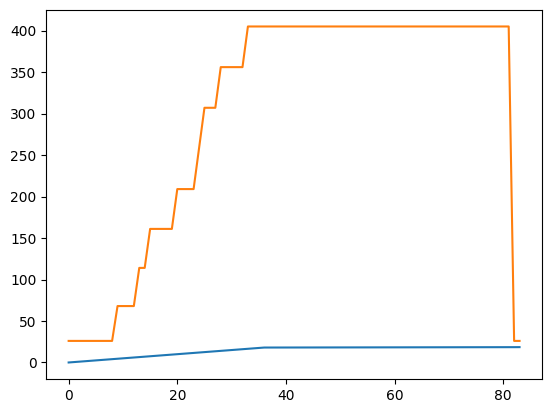

In [ ]:
plt.plot(resultadosDinossauroOtimizadoMaior)

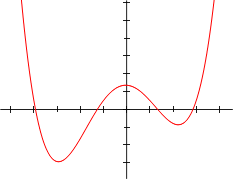

É possível notar, entretanto, que houve uma troca de precisão por velocidade. O resultado final encontrado aqui foi a máxima local.

Para conseguir o melhor resultado global nesse caso apenas com muita sorte ou testando realmente todas as possibilidades.

# Aumentando a complexidade
Esse jogo até agora está muito simples, nós sabemos que o de verdade não é bem assim...

A partir de agora será possível segurar o botão de pulo para pular por mais tempo ou soltá-lo cedo para descer mais rápido

In [ ]:
# A partir de agora o dinossauro terá acesso ao acelerômetro do jogo
class AmbienteComplexo(Ambiente):
  def __init__(self,velocidade):
    Ambiente.__init__(self)
    self.velocidade = velocidade

class Engine_complexa(Engine):
  def __init__(self,x=100,y=10,dinossauro=None):
    Engine.__init__(self,x,y,dinossauro)
    self.ambiente = AmbienteComplexo(self.velocidade)

  # Na engine normal o jogo acelerava mas não informava ao ambiente a velocidade
  def acelera(self):
    self.velocidade += self.aceleracao
    self.ambiente.velocidade = self.velocidade

  # Quando estiver subindo o dinossauro pode parar de apertar
  # O botão de pulo para descer mais rápido
  def receber_entrada(self):
    acao = self.dinossauro.reagir(self.ambiente)
    if acao == Acao.PULAR and not self.dinossauro.pulando:
      self.dinossauro.pulando = True
      self.dinossauro.velocidade_vertical += self.dinossauro.forca_pulo
    if acao == Acao.NADA and self.dinossauro.pulando:
      if self.dinossauro.velocidade_vertical > 0:
        self.dinossauro.velocidade_vertical = 0

Com essa pequena modificação, o trabalho para programar o dinossauro acaba de ficar ordens de magnitude mais complexo.

E se adicionarmos cactos de tamanhos diferentes, pterodátilos, a habilidade de se agachar?

No começo pode até ser possível fazer algo que resolva, porém conforme a complexidade de problemas vão aumentando a viabilidade de programá-los do zero pode ficar inviável.

# Aproximador universal de função
As redes neurais de acordo com o teorema da aproximação universal podem, com complexidade o suficiente, ser usadas para aproximar funções arbitrárias.

Sua origem teve como o objetivo simular como os neurônios são ativados.

rede_simples.svg

In [ ]:
# Para um agente baseado em redes neurais os parametros
# passam a significar os pesos das conexões e viés
class DinossauroNeuralSimples(Dinossauro):
  def __init__(self, x=0,y=0,parametros=np.array([0,0,0])):
    Dinossauro.__init__(self,x,y)
    self.parametros = parametros

  def reagir(self,ambiente):
    entrada = np.array([ambiente.velocidade,ambiente.cacto_mais_proximo().x,1])
    # Em vez de escrever a lógica é necessário calcular
    # Apenas as multiplicações de matrizes
    saida = entrada@self.parametros
    if saida >= 0:
      return Acao.PULAR
    return Acao.NADA

In [ ]:
# Com uma função simples é possível recriar manualmente o comportamento anterior
resultadosDinossauroNeuralSimples = []
for distancia_pulo in range(0,30):
  engineComplexa = Engine_complexa(
      x = 30,
      dinossauro = DinossauroNeuralSimples(
          # Olhando novamente para o diagrama a velocidade não tem impacto
          # na decisão enquanto quanto menor a distância do cacto mais
          # importante ele é, o threshold é o viés que vira a distancia pro pulo
          parametros=np.array([0,-1,distancia_pulo])
          )
      )
  while engineComplexa.frame():
    engineComplexa.receber_entrada()
  resultadosDinossauroNeuralSimples.append(engineComplexa.pontos)

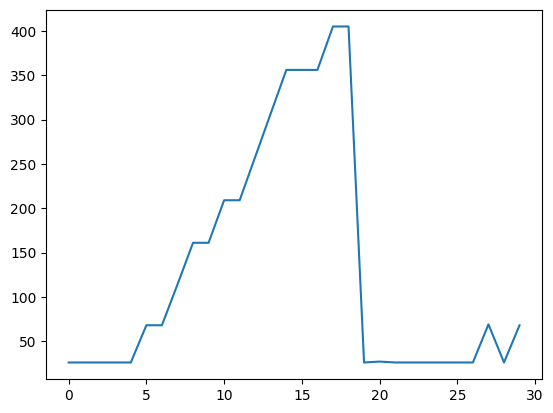

In [ ]:
plt.plot(resultadosDinossauroNeuralSimples)

Pelo menos igual ao código manual conseguimos fazer, porém agora podemos testar mais possibilidades.

In [ ]:
resultadosDinossauroNeuralSimples = np.zeros(shape=(30,30))
# O mesmo estilo de busca feito anteriormente agora ganhou uma dimensão a mais
for distancia_pulo in range(0,30):
  for peso_velocidade in range(0,30):
    engineComplexa = Engine_complexa(
      x = 30,
      dinossauro = DinossauroNeuralSimples(
          parametros=np.array([
                                    1.5-peso_velocidade/10,
                                    -1,
                                    distancia_pulo
                                    ])
      )
    )
    while engineComplexa.frame():
      engineComplexa.receber_entrada()
    resultadosDinossauroNeuralSimples[distancia_pulo][peso_velocidade] = engineComplexa.pontos

[Text(0.5, 0, 'w1'), Text(0.5, 0.5, 'b'), Text(0.5, 0, 'resultado')]

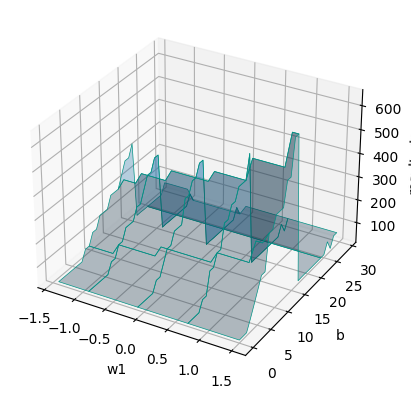

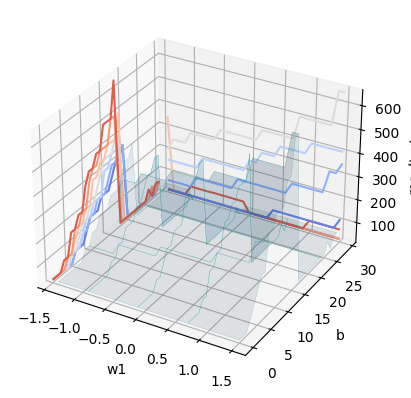

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
x = np.arange(1.5, -1.5, -0.1)
y = np.arange(0,30,1)
X, Y = np.meshgrid(x, y)
Z = resultadosDinossauroNeuralSimples
ax.plot_surface(X, Y, Z, edgecolor='xkcd:teal', lw=0.5, rstride=8, cstride=8,alpha=0.3)
ax.set(xlabel='w1', ylabel='b', zlabel='resultado')

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, edgecolor='xkcd:teal', lw=0.1, rstride=8, cstride=8,alpha=0.1)
ax.contour(X, Y, Z, zdir='x', offset=-1.5, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=30, cmap='coolwarm')
ax.set(xlabel='w1', ylabel='b', zlabel='resultado')


Porém é possível notar que o peso na distância do próximo cacto (w2) se manteve em "-1" para a criação desse gráfico. Fica evidente como adicionar essa dimensão iria dificultar a visualização e aumentar consideravelmente o custo computacional. A partir da necessidade de otimização que surge com esse aumento de complexidade que surgem diversas [técnicas de aprendizado de máquina](https://en.wikipedia.org/wiki/Metaheuristic):
- redes geneticas
- back propagation
- ...

# Caveats
existem alguns truques de implementação que não foram mencionados para simplificar a explicação mas são extremamente necessários para se manter em mente:

## O viés é uma mentira
Para facilitar as operações com matrizes toda camada é considerada como possuindo um neurônio a mais que está sempre ligado no final, assim o viés pode ser calculado e treinado como apenas outro peso.

Para as outras explicações essa etapa pode ser ignorada mas é bom manter em mente esse detalhe.

rede_simples.svg

caveat_vies.svg

## Função de ativação
Na vida real todo resultado salvo em um neurônio é modificado por uma função de ativação antes de ser passado para frente. Porém como não existiam camadas profundas até agora isso estava sendo desconsiderado

caveal_ativacao.svg

# matrizes matrizes e mais matrizes
Se uma rede neural simples já pode ser considerada um aproximador universal de função por que existem redes neurais profundas?

Se fossem apenas operações lineares diretas realmente não faria diferença pois a algebra linear mostra que seria possível achatar as camadas ao multiplicar as matrizes de transformação que representam a rede.

rede_profunda_simplificada_sem_ativacao.svg

rede_profunda_simplificada_sem_ativacao_2.svg

Porém existe um detalhe especial que surge ao aplicar funções não lineares às saídas dos neurônios: as propriedades da algebra linear não podem mais serem aplicadas para simplificar a rede.

Falar isso pode entrar por um ouvido e sair pelo outro para a maioria das pessoas.

O resultado por outro lado é evidente, cada camada serve como um nível de abstração para a camada anterior e foi esse ponto que permitiu o avanço das redes neurais.



rede_profunda_simplificada.svg

Antes disso houve uma época que não importava a quantidade de dados o tempo para melhorar os resultados de uma rede faziam ela lentamente chegar a uma porcentagem máxima de acerto e não parecer melhorar depois do limite.

rede_profunda.svg

# Na vida real

https://keras.io/examples/rl/actor_critic_cartpole/

https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

In [ ]:
!pip install gymnasium
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
import keras
from keras import layers
from keras import ops
from keras.models import Model
import tensorflow as tf

In [ ]:
import gymnasium as gym
from gymnasium import spaces
from gymnasium.wrappers import FlattenObservation
from gymnasium.envs.registration import register

## transformando o jogo em um ambiente gym

In [ ]:
class AmbienteReal(AmbienteComplexo):
  # cacto
  # velocidade
  velocidade_vertical = 0
  pulando = False
  def __init__(self,velocidade,x,y,width):
    AmbienteComplexo.__init__(self,velocidade)
    self.x = x
    self.y = y
    self.width = width

  def cacto_mais_proximo(self):
    if len(self.cactos) == 0: return Cacto(x=self.width)
    cacto_mais_proximo = self.cactos[0]
    for cacto in self.cactos:
      if cacto.x < cacto_mais_proximo.x:
        cacto_mais_proximo = cacto
    return cacto

  def _get_obs(self):
    cacto_p = self.cacto_mais_proximo()
    return {
        "dinossauro": np.array([self.x,self.y],dtype=np.float32),
        "velocidade": np.array([self.velocidade,self.velocidade_vertical],dtype=np.float32),
        "pulo": np.array([self.pulando],dtype=bool),
        "cacto": np.array([cacto_p.x,cacto_p.h],dtype=np.float32)
    }


In [ ]:
class EngineReal(gym.Env):
  metadata = {"render_modes": ["terminal"], "render_fps": 4}
  def __init__(self,render_mode=None,width=30,height=10):
    self.width = width
    self.height = height
    self.observation_space = spaces.Dict(
        {
            "dinossauro": spaces.Box( # Posição do dinossauro
                low=np.array([0,0]),
                high=np.array([width,height]),
                shape=(2,),
                dtype=np.float32
                ),
            "velocidade": spaces.Box( # Velocidade Cartesiana do dinossauro
                low=np.array([0,0]),
                high=np.array([inf,inf]),
                shape=(2,),
                dtype=np.float32
            ),
            "pulo": spaces.MultiBinary(1), # Pulando?
            "cacto": spaces.Box( # Cacto mais proximo
                low=np.array([0,0]),
                high=np.array([width,height]),
                shape=(2,),
                dtype=np.float32
            )
        }
    )
    # ø ou pular
    self.action_space = spaces.Discrete(2)
    self._action_to_direction = {
        0: Acao.NADA,
        1: Acao.PULAR
    }

    assert render_mode is None or render_mode in self.metadata["render_modes"]
    self.render_mode = render_mode

  def _get_info(self):
    return {"pontuacao":self.pontos}

  def _get_obs(self):
    return self.ambiente._get_obs()

  def reset(self, seed=None, options=None):
    super().reset(seed=seed)
    self.pontos = 0
    self.gravidade = .1
    self.aceleracao = .01
    self.forca_pulo = 1
    if options != None:
      if "agent_x" in options:
        agent_x = options["ageny_x"]
      else:
        agent_x = 0
      if "agent_y" in options:
        agent_y = options["agent_y"]
      else:
        agent_y = 0
    else:
      agent_x = 0
      agent_y = 0
    self.ambiente = AmbienteReal(1,agent_x,agent_y,self.width)
    observation = self._get_obs()
    info = self._get_info()
    if self.render_mode == "terminal":
        self._render_frame()
    return observation, info

  def step(self,action):
    self.receber_entrada(action)
    terminated = self.frame()
    observation = self._get_obs()
    reward = 1#self.pontos
    info = self._get_info()
    if self.render_mode == "terminal":
        self._render_frame()
    return observation, reward, terminated, False, info

  def render_frame(self):
    clear_output()
    #print("\b"*(self.x*self.y+self.y))
    for i in range(self.height):
      for j in range(self.width):
        virtual_width = self.width - 1 - j
        virtual_height = self.height - 1 - i
        if self.verifica_cacto(virtual_width,virtual_height):
          print("🌵",end="")
          continue
        if self.verifica_dinossauro(virtual_width,virtual_height):
          print("🦖",end="")
          continue
        else:
          print("⬛",end="")
          continue
      print()

  def verifica_cacto(self,x,y):
    for cacto in self.ambiente.cactos:
      if cacto.verifica_hitbox(x,y,0):
        return True
    return False

  def verifica_dinossauro(self, x,y):
    return abs(self.ambiente.x - x) <= 0.5 and abs(self.ambiente.y - y) <= 0.5

  def novo_cacto(self):
    self.ambiente.cactos.append(Cacto(self.width,3,2))

  def frame(self):
    if self.pontos%50 == 0:
      self.novo_cacto()
    self.ambiente.y += self.ambiente.velocidade_vertical
    self.ambiente.velocidade_vertical -= self.gravidade
    if self.ambiente.y < 0:
      self.ambiente.y = 0
      self.ambiente.pulando = False
      self.ambiente.velocidade_vertical = 0
    cacto_i = 0
    while cacto_i < len(self.ambiente.cactos):
      cacto = self.ambiente.cactos[cacto_i]
      if cacto.verifica_hitbox(self.ambiente.x,self.ambiente.y,self.ambiente.velocidade):
        return True
      cacto.x -= self.ambiente.velocidade
      if cacto.x < -1:
        self.ambiente.cactos.pop(cacto_i)
        cacto_i -= 1
      cacto_i += 1
    self.pontos += 1
    self.acelera()
    return False

  def acelera(self):
    self.ambiente.velocidade += self.aceleracao

  def receber_entrada(self,action):
    acao = self._action_to_direction[action]
    if acao == Acao.PULAR and not self.ambiente.pulando:
      self.ambiente.pulando = True
      self.ambiente.velocidade_vertical += self.forca_pulo
    if acao == Acao.NADA and self.ambiente.pulando:
      if self.ambiente.velocidade_vertical > 0:
        self.ambiente.velocidade_vertical = 0


In [ ]:
register(
     id="EngineReal-v0",
     entry_point=EngineReal,
)

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment EngineReal-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [ ]:
env = gym.make("EngineReal-v0")
wrapped_env = FlattenObservation(env)#env

## criando o aprendizado por reforço
adaptado de: https://keras.io/examples/rl/actor_critic_cartpole/

In [ ]:
class DinossauroNeuralReal(Dinossauro):
  def __init__(self, x=0,y=0,parametros):
    Dinossauro.__init__(self,x,y)
    self.parametros = parametros

  def reagir(self,ambiente):
    entrada = np.array([ambiente.velocidade,ambiente.cacto_mais_proximo().x,1])
    saida = parametros.predict(entrada).argmax()
    if saida == 1:
      return Acao.PULAR
    return Acao.NADA

In [ ]:
entrada = layers.Input(shape=(7,))
common = layers.Dense(3, activation="relu")(entrada)
acao = layers.Dense(2, activation="softmax")(common)
critico = layers.Dense(1)(common)
model = Model(inputs=entrada, outputs=[acao,critico])


In [ ]:
eps = np.finfo(np.float32).eps.item()
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

while True:  # Run until solved
    state,info = wrapped_env.reset()
    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1, 1000):
            # env.render(); Adding this line would show the attempts
            # of the agent in a pop up window.

            # state = ops.convert_to_tensor(state)
            state = tf.ragged.stack(state)
            state.to_tensor()
            # state = ops.expand_dims(state, 0)
            # print(state)

            # Predict action probabilities and estimated future rewards
            # from environment state
            action_probs, critic_value = model(state)
            critic_value_history.append(critic_value[0, 0])
            # print(action_probs)
            # Sample action from action probability distribution
            action = np.random.choice(2, p=np.squeeze(action_probs))
            action_probs_history.append(ops.log(action_probs[0, action]))

            # Apply the sampled action in our environment
            state, reward, done, _, _ = wrapped_env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break

        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate expected value from rewards
        # - At each timestep what was the total reward received after that timestep
        # - Rewards in the past are discounted by multiplying them with gamma
        # - These are the labels for our critic
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + 0.99 * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalize
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calculating loss values to update our network
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # At this point in history, the critic estimated that we would get a
            # total reward = `value` in the future. We took an action with log probability
            # of `log_prob` and ended up receiving a total reward = `ret`.
            # The actor must be updated so that it predicts an action that leads to
            # high rewards (compared to critic's estimate) with high probability.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # The critic must be updated so that it predicts a better estimate of
            # the future rewards.
            critic_losses.append(
                huber_loss(ops.expand_dims(value, 0), ops.expand_dims(ret, 0))
            )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Clear the loss and reward history
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Log details
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

    if running_reward >= 400.0:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        break


running reward: 12.30 at episode 10
running reward: 20.09 at episode 20
running reward: 28.03 at episode 30
running reward: 29.61 at episode 40
running reward: 32.18 at episode 50
running reward: 31.57 at episode 60
running reward: 35.26 at episode 70
running reward: 31.99 at episode 80
running reward: 29.99 at episode 90
running reward: 36.83 at episode 100
running reward: 36.05 at episode 110
running reward: 34.17 at episode 120
running reward: 32.61 at episode 130
running reward: 33.53 at episode 140
running reward: 34.80 at episode 150
running reward: 31.67 at episode 160
running reward: 35.24 at episode 170
running reward: 37.42 at episode 180
running reward: 36.58 at episode 190
running reward: 37.12 at episode 200
running reward: 39.13 at episode 210
running reward: 51.68 at episode 220
running reward: 44.49 at episode 230
running reward: 45.00 at episode 240
running reward: 48.31 at episode 250
running reward: 55.51 at episode 260
running reward: 61.74 at episode 270
running re

KeyboardInterrupt: 

In [ ]:
print(model.summary())

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_48 (Dense)          │ (None, 3)              │             24 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_49 (Dense)          │ (None, 2)              │              8 │ dense_48[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_50 (Dense)          │ (None, 1)              │              4 │ dense_48[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
state,info = wrapped_env.reset()
pontos = 0
while True:
  state = tf.ragged.stack(state)
  state.to_tensor()
  action_probs, critic_value = model(state)
  action = np.random.choice(2, p=np.squeeze(action_probs))
  state, reward, done, _, _ = wrapped_env.step(action)
  pontos += reward
  wrapped_env.render_frame()
  time.sleep(.2)
  if done:
    print(pontos)
    break

⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🌵🌵⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🌵🌵⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🌵🌵🦖
27


# Onde pode te encontrar?
- guilherme.toledo@ccc.ufcg.edu.br
- https://www.linkedin.com/in/guilherme-toledo-891447207

## Snnail
- https://www.instagram.com/snnail_ufcg/

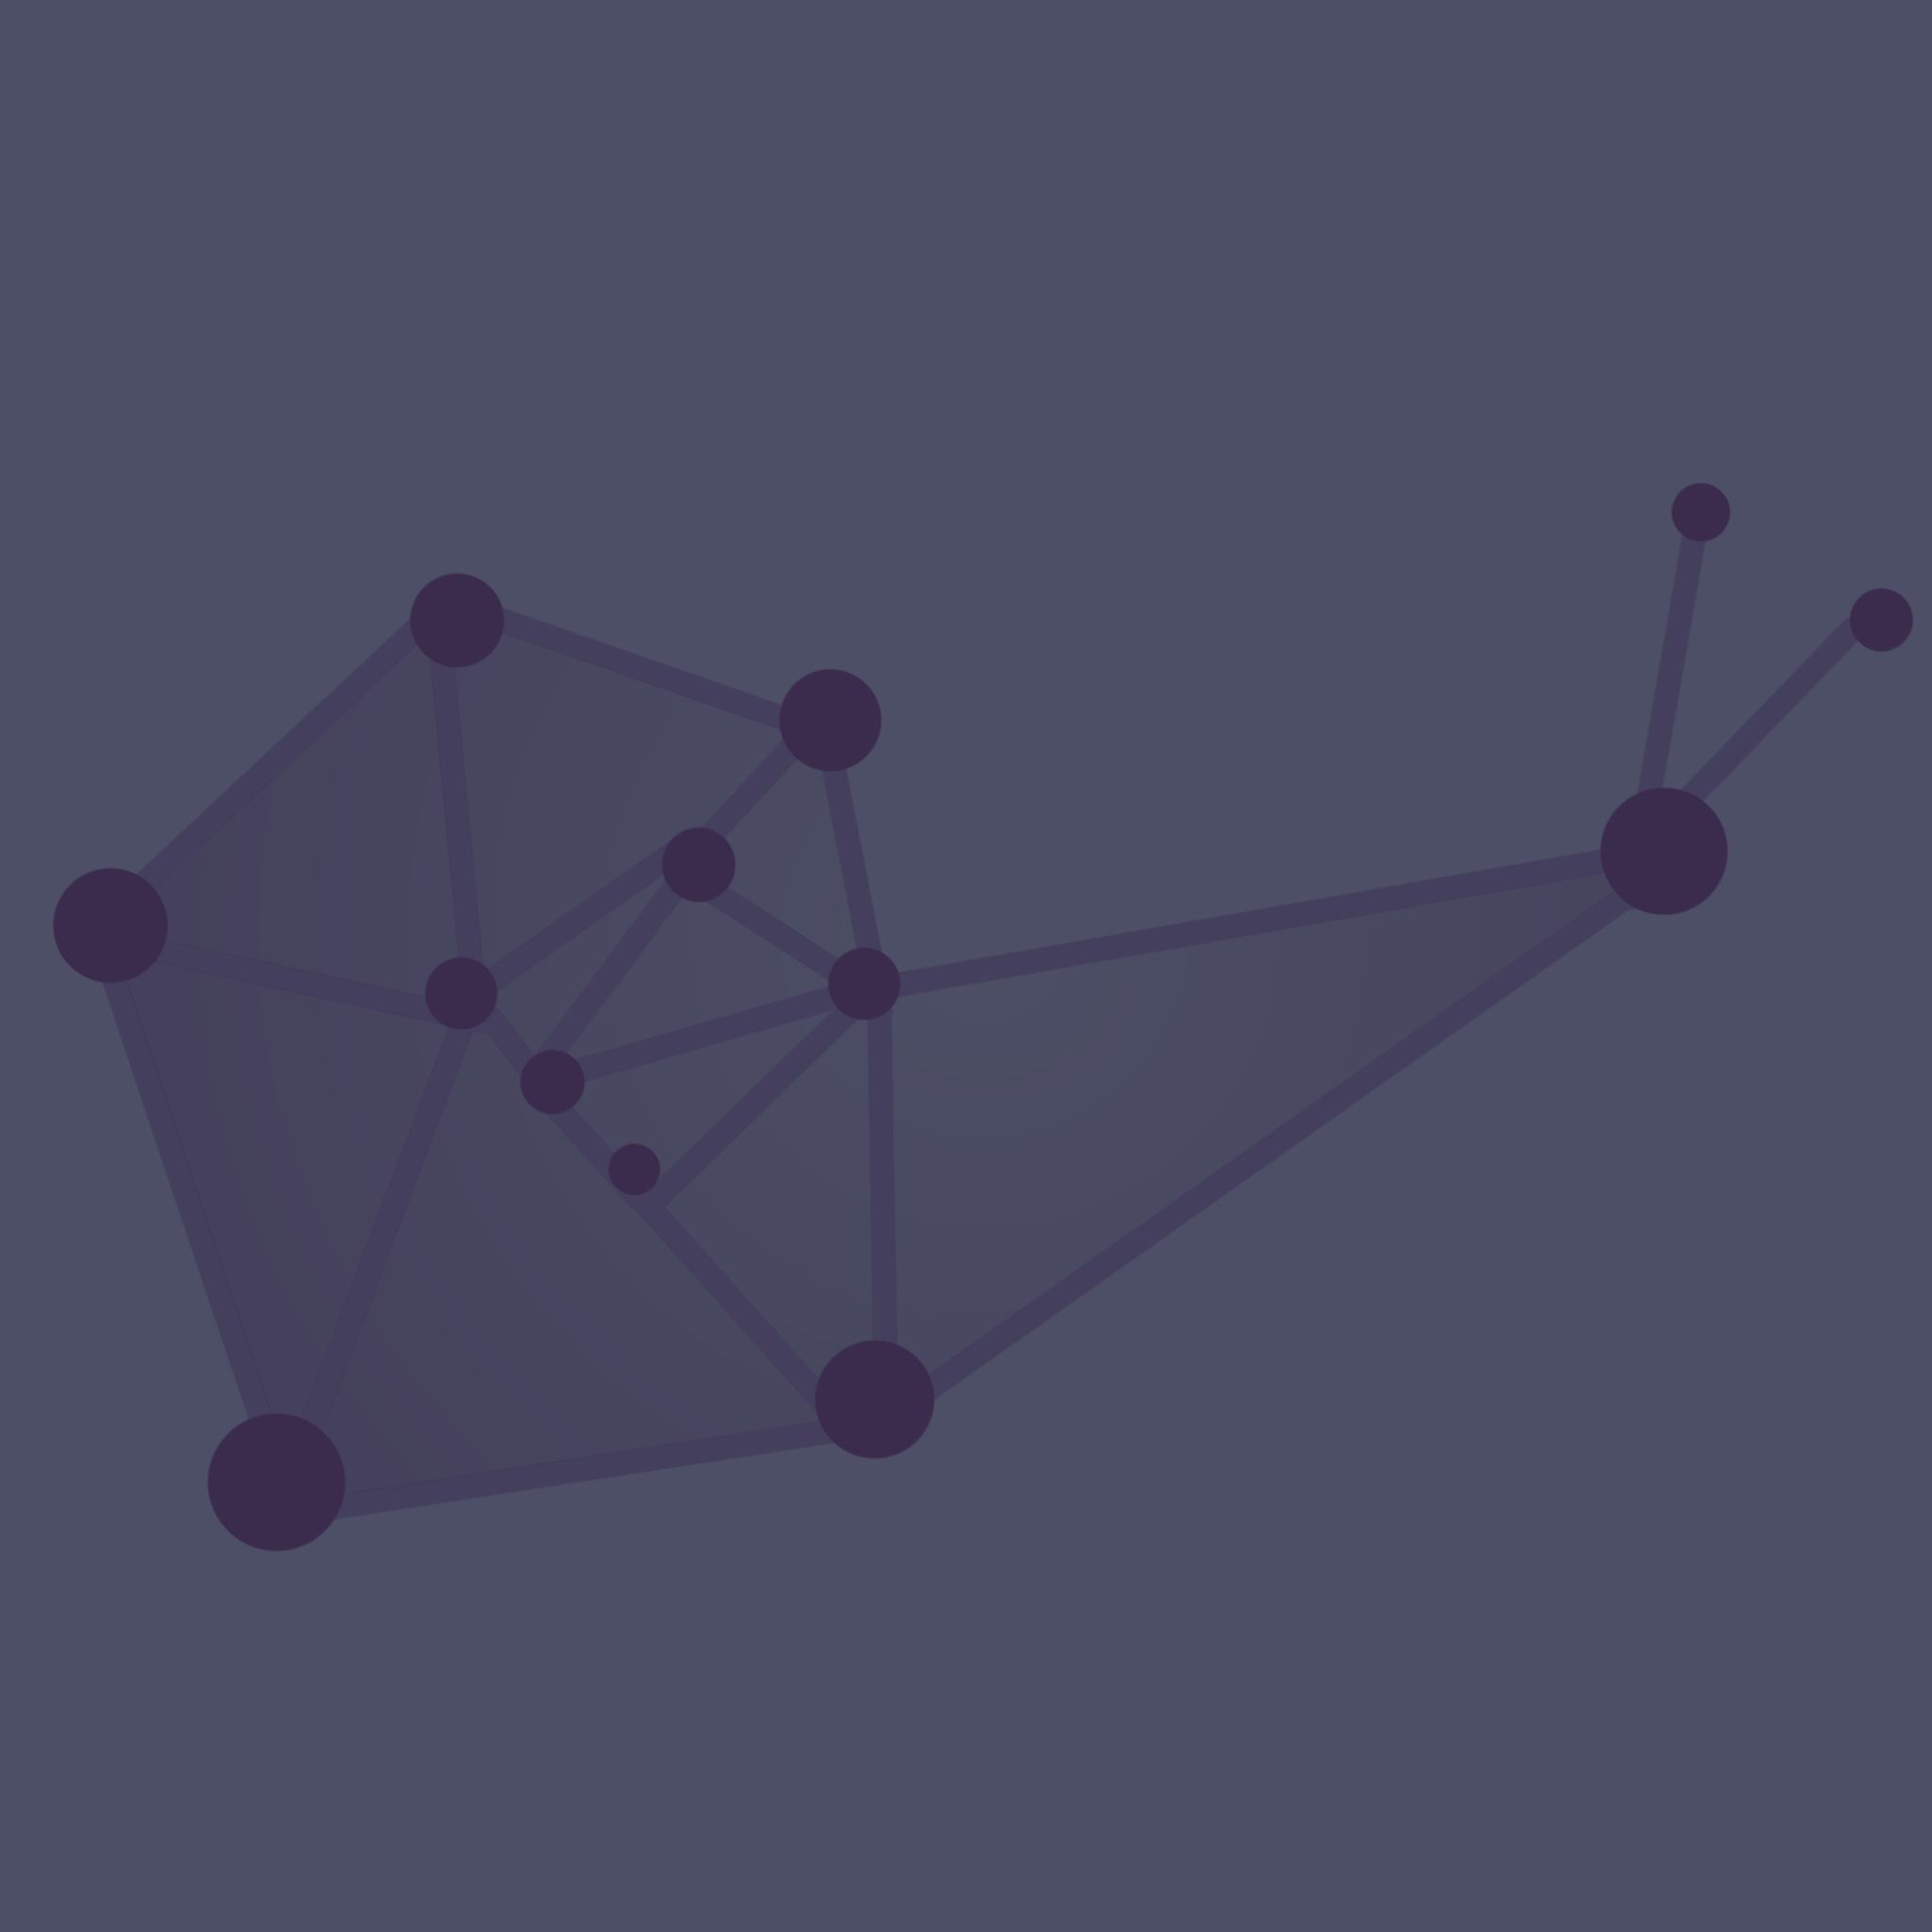
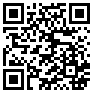